In [1]:
!pip install tensorflow


In [36]:
import tensorflow as tf

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

data = pd.read_csv('Staphylococcus_aureus_Infection_Data.csv')

In [38]:
df = data.dropna()
target  = df.iloc[:, 7]
target = target.astype('int')
feature = df.iloc[:, df.columns != {'ThirtyDay_Death', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death','NineMo_Death', 'OneYear_Death'}]
z = 0
for i in range(5547):
    if( type(feature.iloc[i,1]) != type(float(0))):
        z = feature.iloc[i,1][:2]
        feature.iloc[i,1] = int(z)
        if(feature.iloc[i,1] == 0):
            feature.iloc[i,1] = 1
    else:
        feature.iloc[i,1] = 1

In [39]:
feature=feature.astype('int')
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.2,random_state=42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [40]:
num_classes = len(x_train['OneYear_Death'].unique())

input_shape = 2102

model = tf.keras.models.Sequential([
   tf.keras.layers.Dense(61, activation='relu', input_shape=(input_shape,)),
   tf.keras.layers.Dense(61, activation='relu'),
   tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
111/111 [==============================] - 7s 36ms/step - loss: 7.3390 - accuracy: 0.6337 - val_loss: 0.4983 - val_accuracy: 0.7691
Epoch 2/10
111/111 [==============================] - 3s 25ms/step - loss: 0.6973 - accuracy: 0.7822 - val_loss: 0.2924 - val_accuracy: 0.8840
Epoch 3/10
111/111 [==============================] - 3s 29ms/step - loss: 0.4923 - accuracy: 0.8270 - val_loss: 0.2780 - val_accuracy: 0.9009
Epoch 4/10
111/111 [==============================] - 3s 26ms/step - loss: 0.2050 - accuracy: 0.9329 - val_loss: 0.3134 - val_accuracy: 0.8727
Epoch 5/10
111/111 [==============================] - 3s 24ms/step - loss: 0.3209 - accuracy: 0.8983 - val_loss: 1.1389 - val_accuracy: 0.7568
Epoch 6/10
111/111 [==============================] - 3s 24ms/step - loss: 0.5452 - accuracy: 0.8414 - val_loss: 0.1733 - val_accuracy: 0.9369
Epoch 7/10
111/111 [==============================] - 3s 23ms/step - loss: 0.2353 - accuracy: 0.9191 - val_loss: 0.3520 - val_accuracy: 0.8885

In [42]:
test_loss, test_acc = model.evaluate(x_test, y_test)

35/35 [==============================] - 1s 15ms/step - loss: 0.1398 - accuracy: 0.9622


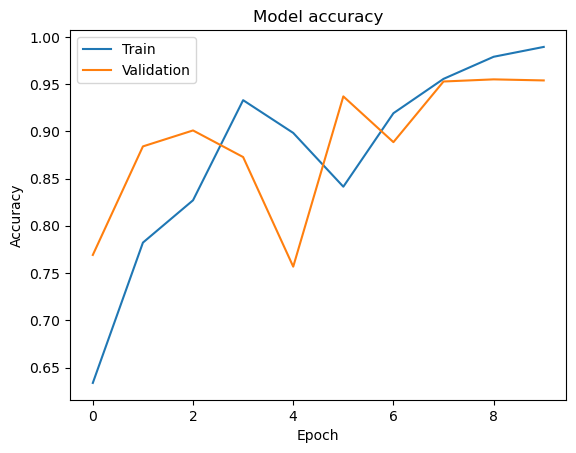

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

35/35 [==============================] - 1s 12ms/step


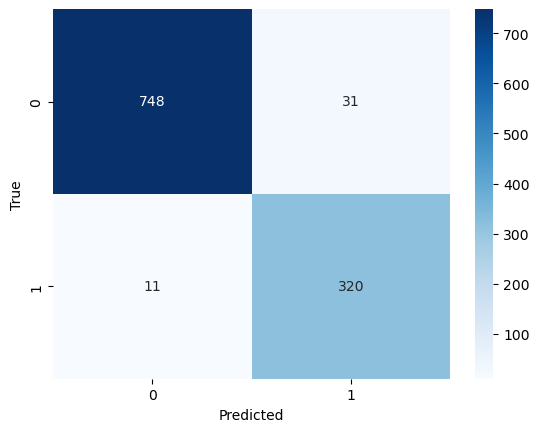

In [44]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets